In [2]:
#importing required packages
import datetime  
import backtrader as bt
import os
import argparse
from strats import RSI_GCross, BB

In [3]:
def backtest(strategy, datafile = 'NBANK.csv', cash = 100000, stake = 3, commission = 0.001, dateformat = 'Ymd'):
    cerebro = bt.Cerebro()
    # You may want to change the default cash for different strategy
    cerebro.addstrategy(strategy)
    
    #date format may be different for different datafiles
    if(dateformat.lower()=='ymd'):
        dtf = '%Y-%m-%d'
    else:
        dtf = '%d-%m-%Y'
    
    datapath = os.getcwd() + "\\..\\data\\" + datafile
    # Creating a Data Feed
    data = bt.feeds.GenericCSVData(
        dataname=datapath,
        dtformat=(dtf),   #You need to change the date format according to the datafile
        tmformat=('%H.%M.%S'),
        datetime=0,
        high=2,
        low=3,
        open=1,
        close=4,
        volume=5,
        fromdate=datetime.datetime(2015, 1, 1),
        #todate=datetime.datetime(2000, 12, 31),
        )
    #adding the required parameters to backtest engine
    cerebro.adddata(data)
    cerebro.broker.setcash(cash)
    cerebro.addsizer(bt.sizers.FixedSize, stake = stake)
    cerebro.broker.setcommission(commission= commission)
    
    #running the backtest and visualizing the results
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot()

Starting Portfolio Value: 100000.00
2015-02-06, BUY CREATE, 18786.70
2015-02-09, BUY EXECUTED, Price: 18650.00, Cost: 55950.00, Comm 55.95
2015-02-28, SELL CREATE, 19691.20
2015-03-02, SELL EXECUTED, Price: 19954.50, Cost: 55950.00, Comm 59.86
2015-03-02, OPERATION PROFIT, GROSS 3913.50, NET 3797.69 

2015-03-02, SELL CREATE, 20008.10
2015-03-03, SELL EXECUTED, Price: 20043.40, Cost: -60130.20, Comm 60.13
2015-03-13, BUY CREATE, 18779.80
2015-03-16, BUY EXECUTED, Price: 18786.65, Cost: -60130.20, Comm 56.36
2015-03-16, OPERATION PROFIT, GROSS 3770.25, NET 3653.76 

2015-04-20, BUY CREATE, 18112.75
2015-04-21, BUY EXECUTED, Price: 18102.30, Cost: 54306.90, Comm 54.31
2015-05-04, SELL CREATE, 18501.30
2015-05-05, SELL EXECUTED, Price: 18500.00, Cost: 54306.90, Comm 55.50
2015-05-05, OPERATION PROFIT, GROSS 1193.10, NET 1083.29 

2015-06-04, BUY CREATE, 17719.20
2015-06-05, BUY EXECUTED, Price: 17679.90, Cost: 53039.70, Comm 53.04
2015-06-19, SELL CREATE, 17880.85
2015-06-22, SELL EXECUTE

<IPython.core.display.Javascript object>


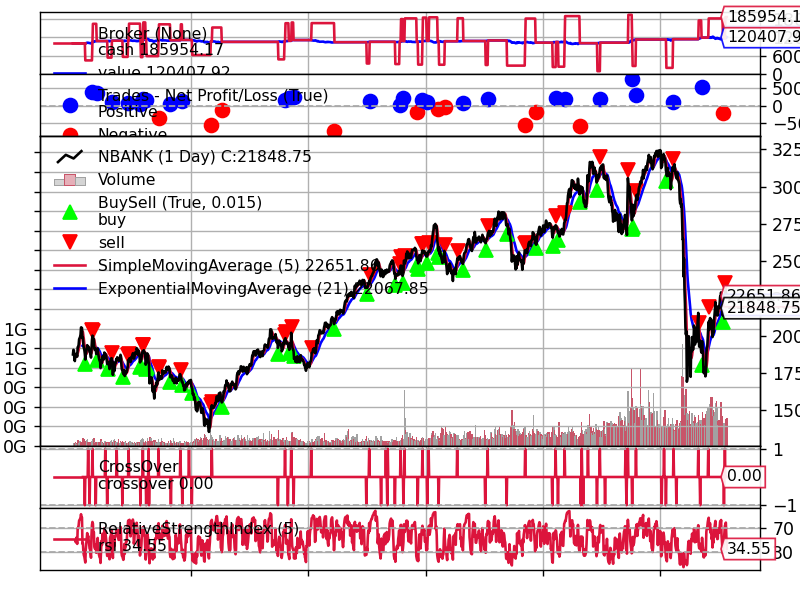

In [5]:
#backtesting RSI+GCross strategy on BankNifty index
backtest(RSI_GCross, datafile = 'NBANK.csv')

Starting Portfolio Value: 100000.00
2018-02-06, BUY CREATE, 24912.77
2018-02-07, BUY EXECUTED, Price: 24892.87, Cost: 74678.61, Comm 74.68
2018-02-28, Sell CREATE, 25029.20
2018-03-01, SELL EXECUTED, Price: 25024.04, Cost: 74678.61, Comm 75.07
2018-03-01, OPERATION PROFIT, GROSS 393.51, NET 243.76 

2019-05-14, BUY CREATE, 25532.05
2019-05-15, BUY EXECUTED, Price: 25400.13, Cost: 76200.39, Comm 76.20
2019-07-31, Sell CREATE, 26864.27
2019-08-01, SELL EXECUTED, Price: 26879.86, Cost: 76200.39, Comm 80.64
2019-08-01, OPERATION PROFIT, GROSS 4439.19, NET 4282.35 

2019-08-06, BUY CREATE, 26029.52
2019-08-07, BUY EXECUTED, Price: 25814.22, Cost: 77442.66, Comm 77.44
2019-09-27, Sell CREATE, 26820.25
2019-09-30, SELL EXECUTED, Price: 26852.33, Cost: 77442.66, Comm 80.56
2019-09-30, OPERATION PROFIT, GROSS 3114.33, NET 2956.33 

2019-10-03, BUY CREATE, 26201.04
2019-10-04, BUY EXECUTED, Price: 26271.70, Cost: 78815.10, Comm 78.82
2019-12-02, Sell CREATE, 27783.04
2019-12-03, SELL EXECUTED, P

<IPython.core.display.Javascript object>


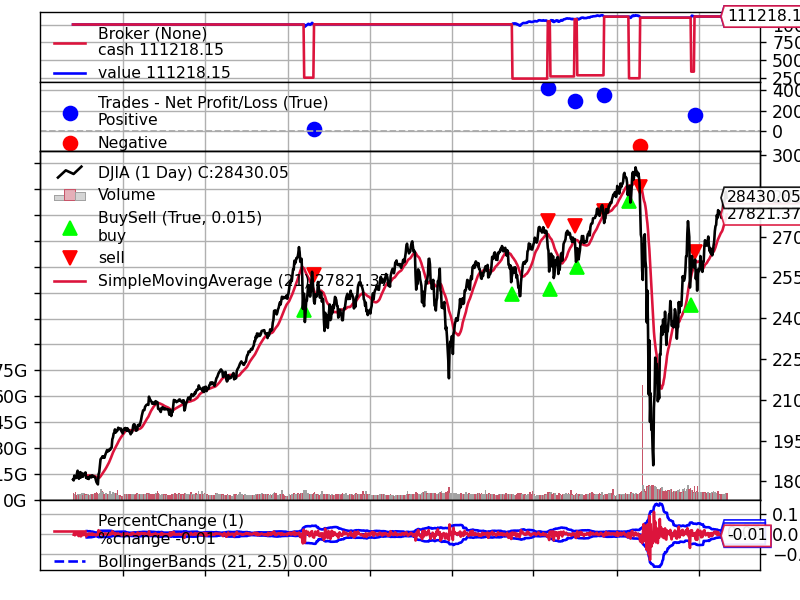

In [6]:
#backtesting Bollinger Bands strategy on Dow Jones index
backtest(BB, datafile = 'DJIA.csv', dateformat = 'ymd')